# Analisis Exploratorio Futuros EURO/DOLAR

In [ ]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go

import warnings

warnings.filterwarnings("ignore")

In [3]:
sns.set_theme()
sns.set_context("paper")

In [36]:
symbol = "EURUSD=X"

futuro = yf.Ticker(symbol)
datos_historicos = futuro.history(start="2022-01-01", end="2023-06-30")
datos_historicos.index = pd.to_datetime(datos_historicos.index)

datos_historicos.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00+00:00,1.137385,1.137592,1.128541,1.137346,0,0.0,0.0
2022-01-04 00:00:00+00:00,1.130199,1.132300,1.127345,1.130224,0,0.0,0.0
2022-01-05 00:00:00+00:00,1.128541,1.134559,1.127764,1.128363,0,0.0,0.0
2022-01-06 00:00:00+00:00,1.131222,1.133067,1.128554,1.131350,0,0.0,0.0
2022-01-07 00:00:00+00:00,1.129586,1.135976,1.129050,1.129688,0,0.0,0.0


In [32]:
datos_historicos.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,389.000000,389.000000,389.000000,389.000000,389.0,389.0,389.0
mean,1.062758,1.066919,1.058422,1.062760,0.0,0.0,0.0
std,0.043592,0.042883,0.044043,0.043595,0.0,0.0,0.0
min,0.959619,0.967006,0.954016,0.959619,0.0,0.0,0.0
25%,1.032855,1.039415,1.029230,1.032855,0.0,0.0,0.0
50%,1.069141,1.073307,1.065235,1.069141,0.0,0.0,0.0
75%,1.091584,1.094523,1.088554,1.091584,0.0,0.0,0.0
max,1.145659,1.149425,1.143641,1.145712,0.0,0.0,0.0


In [33]:
datos_historicos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2022-01-03 00:00:00+00:00 to 2023-06-29 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          389 non-null    float64
 1   High          389 non-null    float64
 2   Low           389 non-null    float64
 3   Close         389 non-null    float64
 4   Volume        389 non-null    int64  
 5   Dividends     389 non-null    float64
 6   Stock Splits  389 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.3 KB


In [37]:
missing_values = datos_historicos.isnull().sum()
print(missing_values)

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


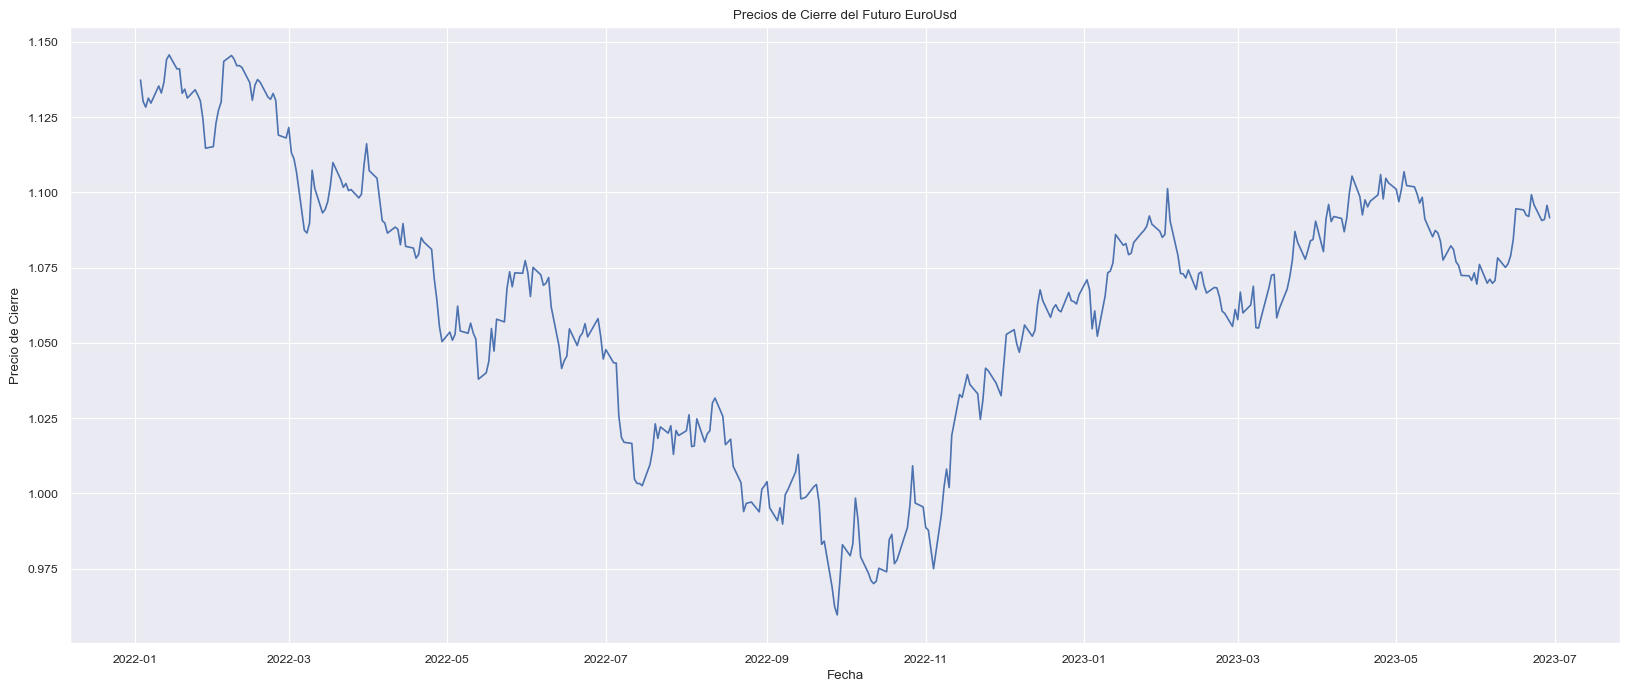

In [38]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos.index, datos_historicos['Close'])
plt.title('Precios de Cierre del Futuro EuroUsd')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()

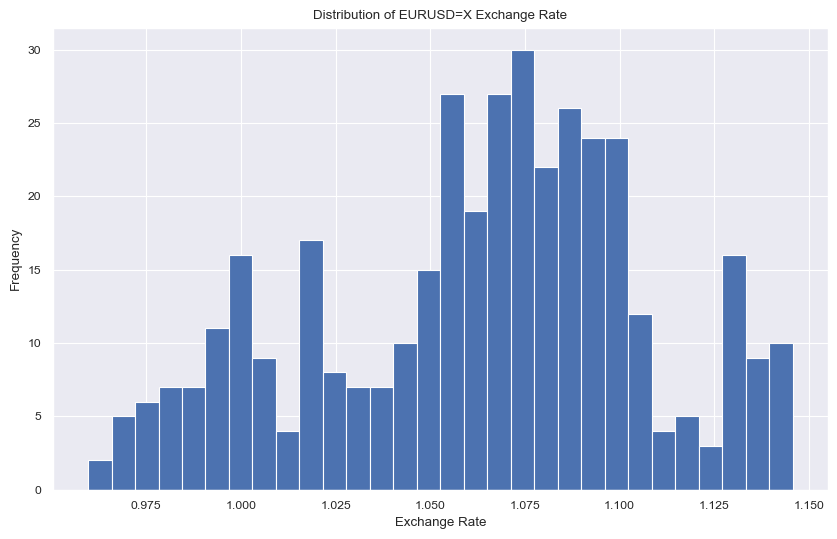

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(datos_historicos['Close'], bins=30)
plt.title('Distribution of EURUSD=X Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

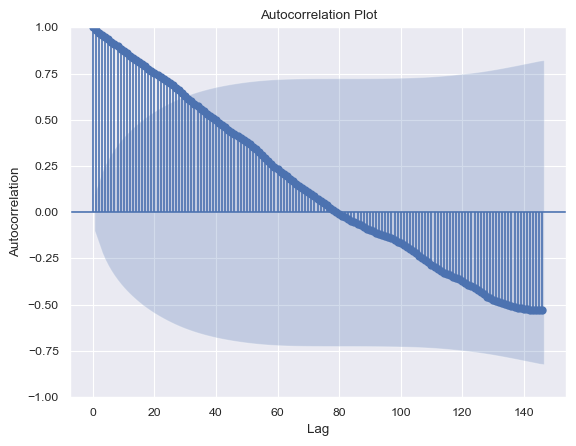

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(datos_historicos['Close'], lags=146)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [7]:
fig = go.Figure(data=[go.Candlestick(x = datos_historicos.index,
                                     open = datos_historicos['Open'], 
                                     high = datos_historicos['High'],
                                     low = datos_historicos['Low'], 
                                     close = datos_historicos['Close'])
                     ])
fig.update_layout(
    title="Euro Dolar",
    xaxis_title="Day",
    yaxis_title="Euro Dolar",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

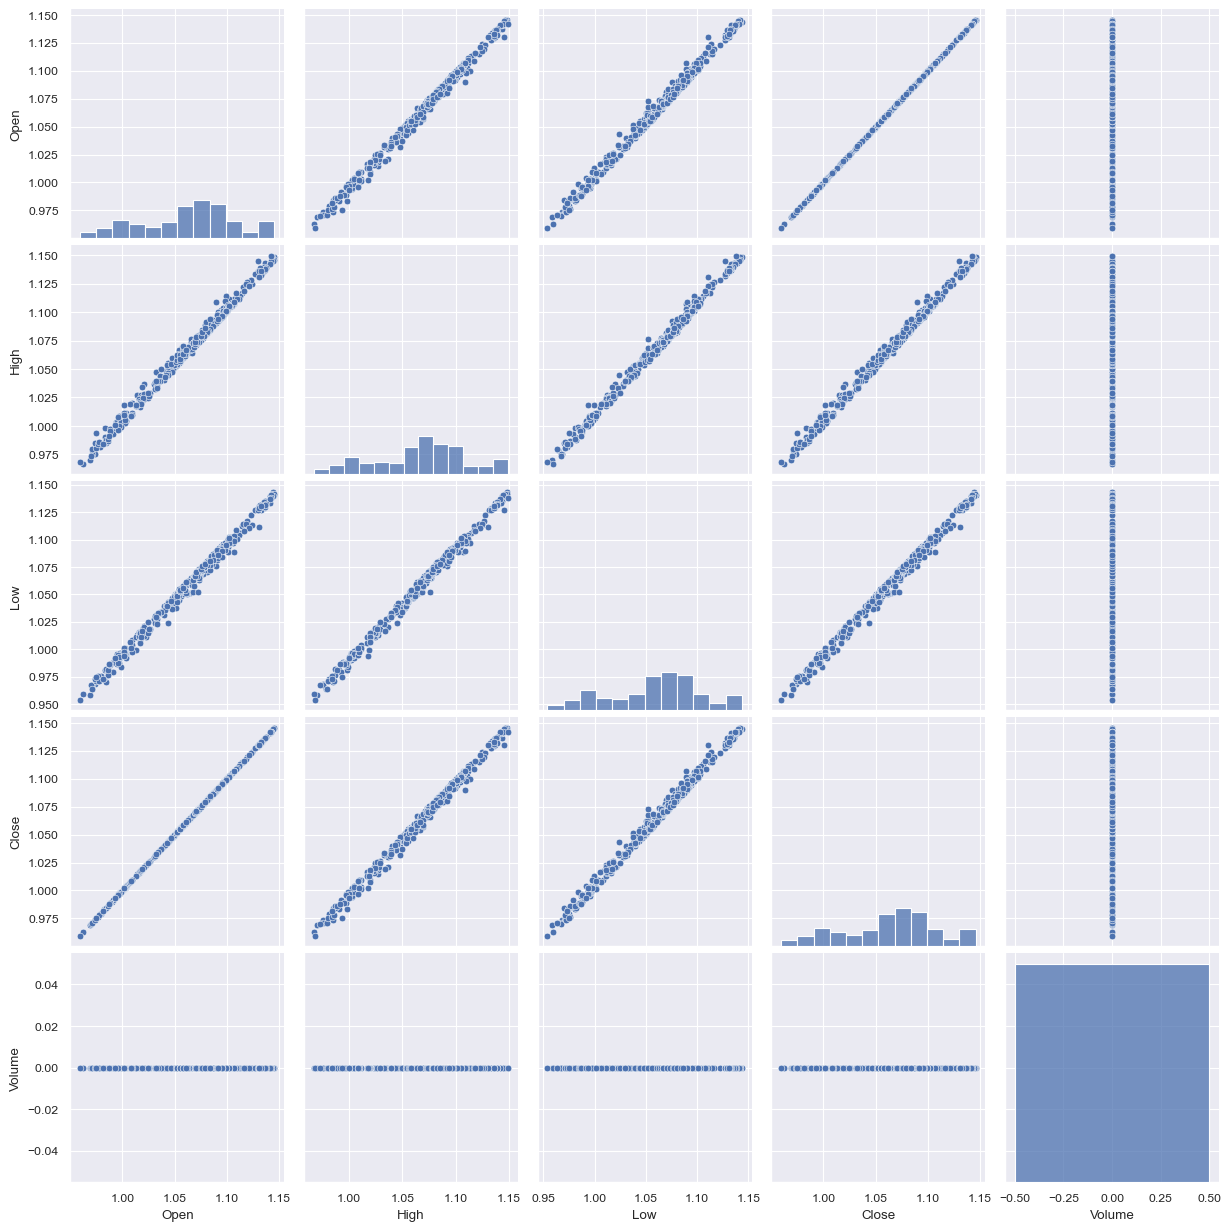

In [8]:
sns.pairplot(datos_historicos.drop(datos_historicos.columns[[5, 6]], axis=1)[1:])

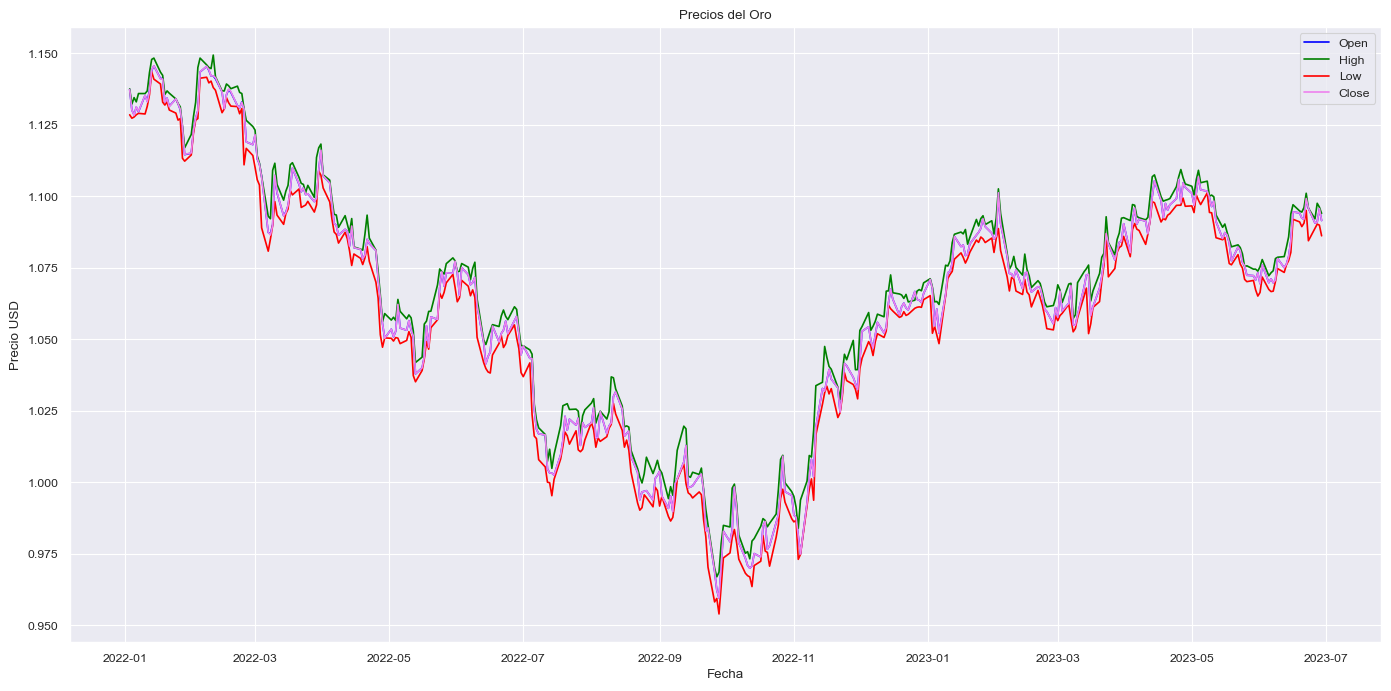

In [11]:
# Configuración de la figura para la visualización
plt.figure(figsize=(14, 7))

plt.plot(datos_historicos.index, datos_historicos['Open'], label='Open', color='blue')
plt.plot(datos_historicos.index, datos_historicos['High'], label='High', color='green')
plt.plot(datos_historicos.index, datos_historicos['Low'], label='Low', color='red')
plt.plot(datos_historicos.index, datos_historicos['Close'], label='Close', color='violet')
plt.title('Precios del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(datos_historicos['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(key, ": ", value)


ADF Statistic: -1.8365134664283391
p-value: 0.36249029507845065
Critical Values:
1% :  -3.4473167281607155
5% :  -2.869018036958473
10% :  -2.5707536074503134


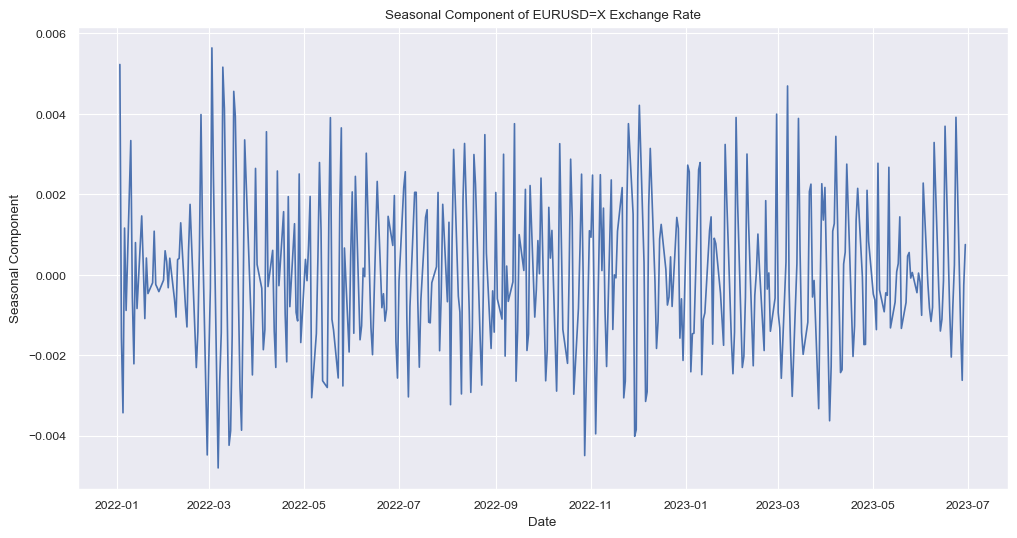

In [17]:
from statsmodels.tsa.seasonal import STL

stl = STL(datos_historicos['Close'])
result = stl.fit()
seasonal = result.seasonal

plt.figure(figsize=(12, 6))
plt.plot(datos_historicos.index, seasonal)
plt.title('Seasonal Component of EURUSD=X Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()


In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = result.resid
lb_test = acorr_ljungbox(residuals, lags=10)
print("Ljung-Box test p-values:", lb_test)


Ljung-Box test p-values:        lb_stat     lb_pvalue
1    33.902665  5.793927e-09
2    36.666445  1.091397e-08
3    53.467080  1.457675e-11
4    73.773491  3.620572e-15
5   155.482719  9.079267e-32
6   160.087683  5.673846e-32
7   167.720807  7.589088e-33
8   194.305352  1.011161e-37
9   196.039361  2.239600e-37
10  207.467730  4.459977e-39


In [40]:
datos_historicos['Retornos'] = datos_historicos['Close'].pct_change()

stat, p = shapiro(datos_historicos['Retornos'].dropna())
print(f'Prueba de Shapiro-Wilk, Estadístico={stat}, p-valor={p}')

Prueba de Shapiro-Wilk, Estadístico=0.9945915937423706, p-valor=0.9107440114021301


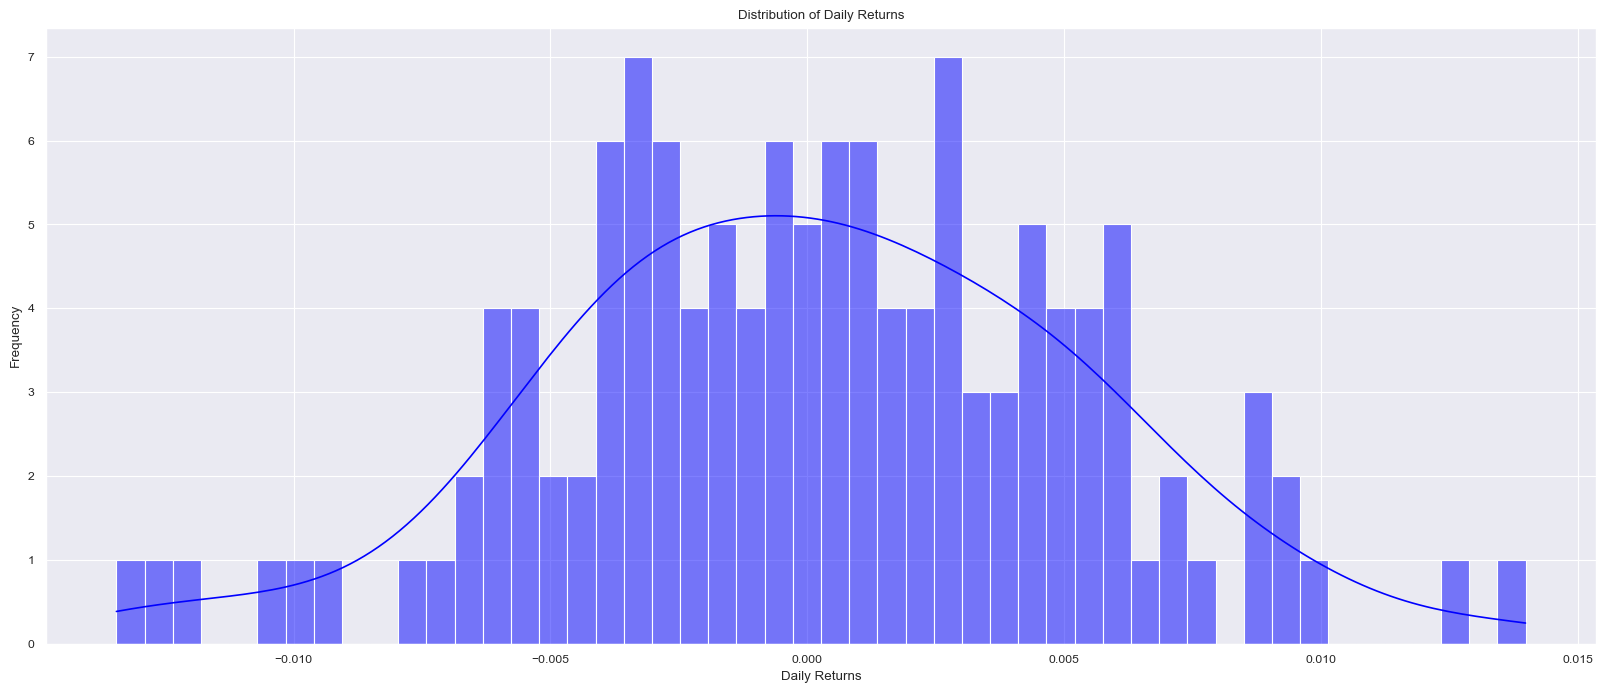

In [41]:
plt.figure(figsize=(20, 8))
sns.histplot(datos_historicos['Retornos'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, shapiro, normaltest, jarque_bera, boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Obtener datos de Yahoo Finance (último año y medio)
ticker = "EURUSD=X" 
futuro = yf.Ticker(ticker)
data = futuro.history(start="2022-01-01", end="2023-06-30")
data.index = pd.to_datetime(data.index)

# Análisis Exploratorio de Datos (EDA)

# Resumen estadístico
print("Resumen estadístico:")
print(data['Close'].describe())
print(data.head())

Resumen estadístico:
count    389.000000
mean       1.062760
std        0.043595
min        0.959619
25%        1.032855
50%        1.069141
75%        1.091584
max        1.145712
Name: Close, dtype: float64
                               Open      High       Low     Close  Volume  \
Date                                                                        
2022-01-03 00:00:00+00:00  1.137385  1.137592  1.128541  1.137346       0   
2022-01-04 00:00:00+00:00  1.130199  1.132300  1.127345  1.130224       0   
2022-01-05 00:00:00+00:00  1.128541  1.134559  1.127764  1.128363       0   
2022-01-06 00:00:00+00:00  1.131222  1.133067  1.128554  1.131350       0   
2022-01-07 00:00:00+00:00  1.129586  1.135976  1.129050  1.129688       0   

                           Dividends  Stock Splits  
Date                                                
2022-01-03 00:00:00+00:00        0.0           0.0  
2022-01-04 00:00:00+00:00        0.0           0.0  
2022-01-05 00:00:00+00:00        0.0   

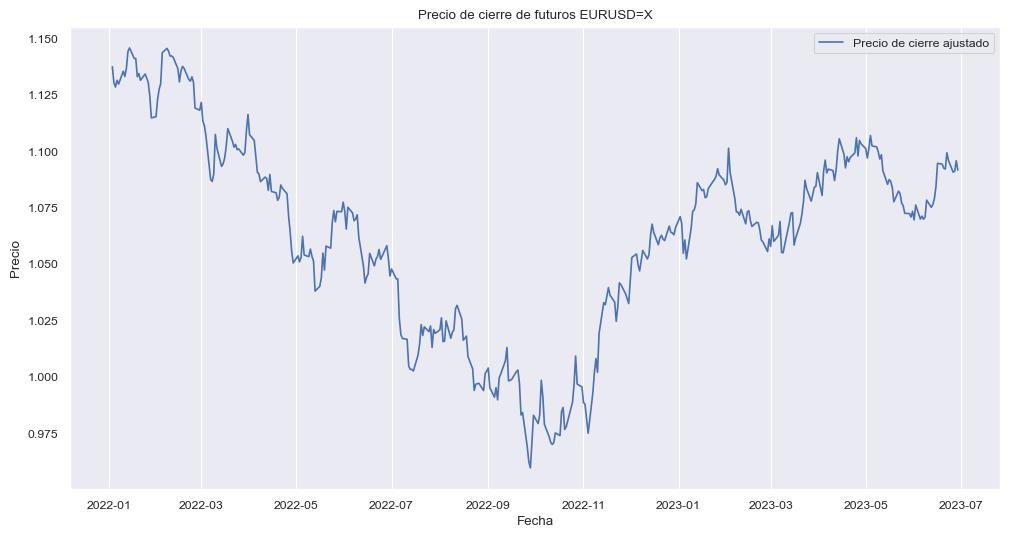

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Precio de cierre ajustado')
plt.title(f'Precio de cierre de futuros {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(axis='y')
plt.show()

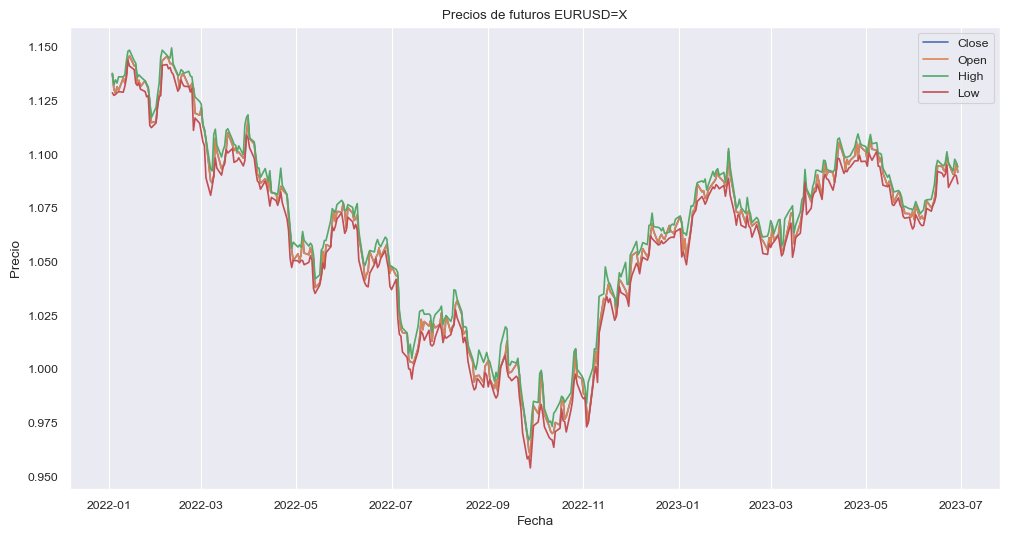

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['Open'], label='Open')
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.title(f'Precios de futuros {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(axis='y')
plt.show()

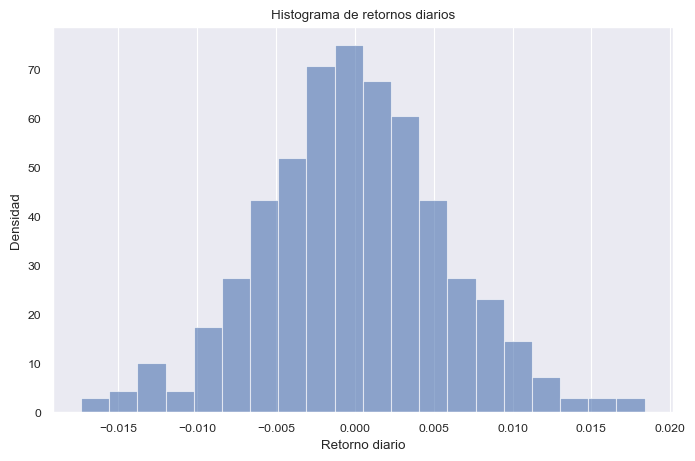

In [13]:
# Histograma de retornos
daily_returns = data['Close'].pct_change()
plt.figure(figsize=(8, 5))
plt.hist(daily_returns, bins=20, density=True, alpha=0.6)
plt.title('Histograma de retornos diarios')
plt.xlabel('Retorno diario')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

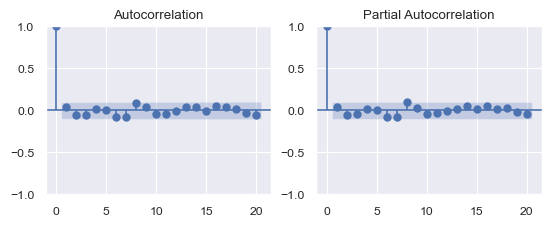

In [29]:
# Transformación Box-Cox (si es necesario)
if abs(daily_returns.skew()) > 0.5:
    daily_returns_transformed, lambda_value = boxcox(daily_returns.dropna() + 1)
    plt.subplot(2, 2, 2)
    plt.hist(daily_returns_transformed, bins=20, density=True, alpha=0.6)
    plt.title(f'Histograma de retornos transformados (Box-Cox, lambda={lambda_value:.2f})')
    plt.xlabel('Retorno transformado')
    plt.ylabel('Densidad')
    plt.grid(axis='y')

# Autocorrelación y autocorrelación parcial
plt.subplot(2, 2, 3)
plot_acf(daily_returns.dropna(), lags=20, ax=plt.gca())
plt.subplot(2, 2, 4)
plot_pacf(daily_returns.dropna(), lags=20, ax=plt.gca())
plt.show()

In [16]:
# Pruebas estadísticas
print("\nPruebas estadísticas:")
# Prueba de normalidad (Shapiro-Wilk, D'Agostino-Pearson, Jarque-Bera)
stat_shapiro, p_shapiro = shapiro(daily_returns.dropna())
stat_normaltest, p_normaltest = normaltest(daily_returns.dropna())
stat_jarque_bera, p_jarque_bera = jarque_bera(daily_returns.dropna())
print(f'Prueba de Shapiro-Wilk: Estadística={stat_shapiro:.3f}, p-valor={p_shapiro:.3f}')
print(f'Prueba de D\'Agostino-Pearson: Estadística={stat_normaltest:.3f}, p-valor={p_normaltest:.3f}')
print(f'Prueba de Jarque-Bera: Estadística={stat_jarque_bera:.3f}, p-valor={p_jarque_bera:.3f}')


Pruebas estadísticas:
Prueba de Shapiro-Wilk: Estadística=0.996, p-valor=0.533
Prueba de D'Agostino-Pearson: Estadística=2.391, p-valor=0.303
Prueba de Jarque-Bera: Estadística=2.360, p-valor=0.307


In [18]:
# Prueba t de Student (hipótesis nula: media de retornos = 0)
stat_t, p_t = ttest_1samp(daily_returns.dropna(), 0)
print(f'Prueba t de Student: Estadística={stat_t:.3f}, p-valor={p_t:.3f}')

# Prueba de Dickey-Fuller Aumentada (hipótesis nula: serie no estacionaria)
result = adfuller(data['Close'])
print('\nPrueba de Dickey-Fuller Aumentada (Close):')
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')

Prueba t de Student: Estadística=-0.300, p-valor=0.764

Prueba de Dickey-Fuller Aumentada:
ADF Statistic: -1.837
p-value: 0.362
